In [11]:
import wave
import numpy as np

from pymagglobal import Model
from pymagglobal.utils import get_grid
from pymagglobal.core import local_curve

from matplotlib import pyplot as plt

In [32]:
SAMPLERATE = 44100
NOTE = 400
DURATION = 1

In [3]:
myModel = Model('GGFMB')

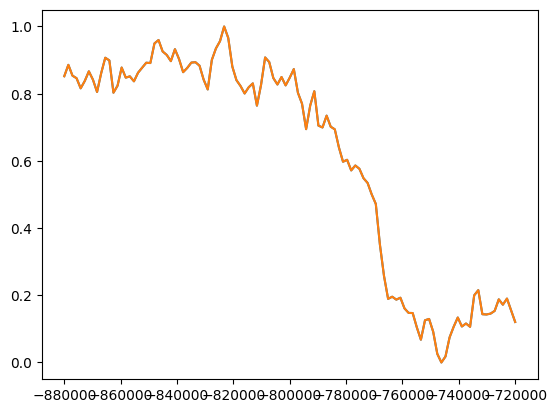

In [55]:
t_min = -880e3
t_max = -720e3

# loc = (52.4, 13.066667)     # Potsdam
loc = (9.931194, 76.267306) # Kochi

res = round(SAMPLERATE / NOTE + 0.5)

t = np.linspace(t_min, t_max, res)
g_1_0 = myModel.splines(t)[:, 0]

# normalize
g_1_0 -= g_1_0.min()
g_1_0 /= g_1_0.max()

# stack
signal = g_1_0[:, None].repeat(NOTE, axis=1).T.flatten()

plt.plot(t, g_1_0)
plt.plot(t, signal[:res])

In [56]:
# Put the channels together with shape (2, 44100).
audio = np.array([signal, signal]).T

# Convert to (little-endian) 16 bit integers.
audio = (audio * (2 ** 15 - 1)).astype("<h")

with wave.open("../out/sound1.wav", "w") as f:
    # 2 Channels.
    f.setnchannels(2)
    # 2 bytes per sample.
    f.setsampwidth(2)
    f.setframerate(samplerate)
    f.writeframes(audio.tobytes())
